<a href="https://colab.research.google.com/github/arjungkk/spr-exercises/blob/main/Bayes_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [ ]:
# Define map
map = starting_pos

# Define functions for convolution 
def move_forward(map):
  new_map = np.zeros(len(map))
  temp1 = np.convolve(map[0:len(new_map) - (len(free_move_forward)-1) ],free_move_forward)
  temp2 = np.convolve(map[-len(near_wall_move_forward)],near_wall_move_forward)
  temp3 = np.convolve(map[-len(next_to_wall_move_forward)],next_to_wall_move_forward)
  new_map = new_map + temp1
  new_map[-len(near_wall_move_forward):len(new_map)] = new_map[-len(near_wall_move_forward):len(new_map)] + temp2
  new_map[-len(next_to_wall_move_forward)] = new_map[-len(next_to_wall_move_forward)] + temp3 
  return new_map

def move_backward(map):
  reverse_map = map[::-1]
  new_map = np.zeros(len(map))
  temp1 = np.convolve(reverse_map[0:len(new_map) - (len(free_move_backward)-1)],free_move_backward[::-1])
  temp2 = np.convolve(reverse_map[-len(near_wall_move_backward)],near_wall_move_backward[::-1])
  temp3 = np.convolve(reverse_map[-len(next_to_wall_move_backward)],next_to_wall_move_backward[::-1])
  new_map = new_map + temp1
  new_map[-len(near_wall_move_backward):len(new_map)] = new_map[-len(near_wall_move_backward):len(new_map)] + temp2
  new_map[-len(next_to_wall_move_backward)] = new_map[-len(next_to_wall_move_backward)] + temp3 
  return new_map[::-1]

#Visualize results
def visualizeBel(map_with_prob):
  # Fixing random state for reproducibility
  np.random.seed(19680801)


  plt.rcdefaults()
  fig, ax = plt.subplots()

  # Example data
  robot_pos = range(1,len(map_with_prob)+1)

  ax.bar(robot_pos, map_with_prob,align='center')
  ax.set_xticks(robot_pos)
  ax.set_xticklabels(robot_pos)
  #ax.invert_yaxis()  # labels read top-to-bottom
  ax.set_xlabel('Position')
  ax.set_title('Probability')

  plt.show()

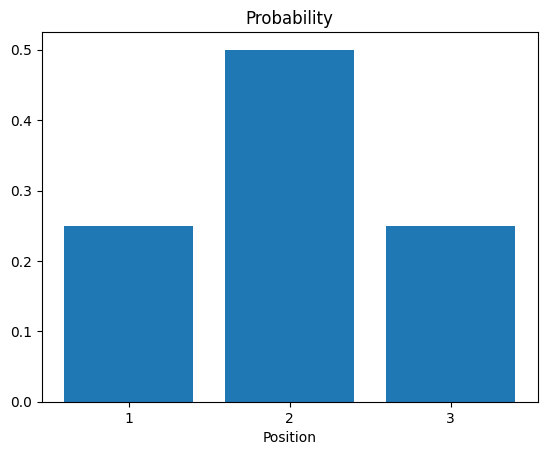

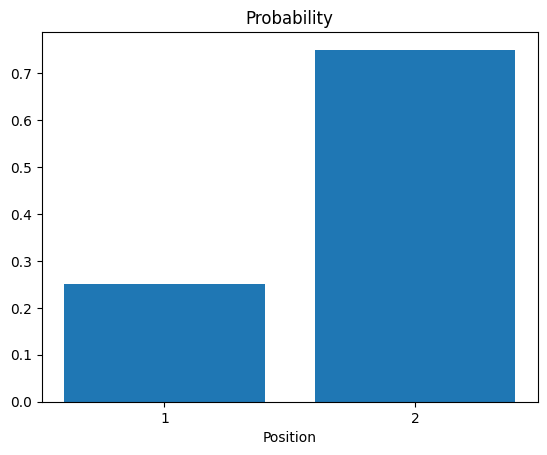

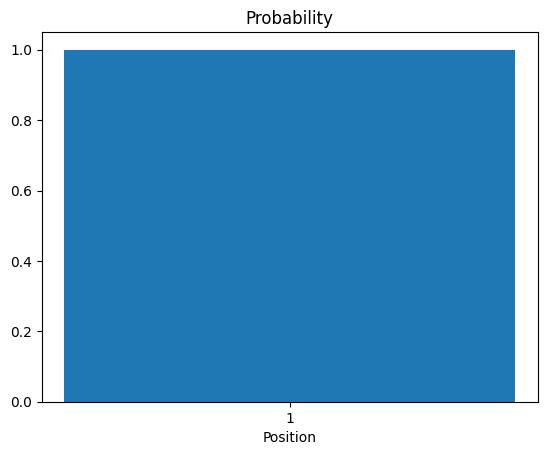

In [ ]:
# Define moves with probabilities
free_move_forward = [0.25, 0.5, 0.25]
near_wall_move_forward = [0.25, 0.75]
next_to_wall_move_forward = [1]
free_move_backward = [0.25, 0.5, 0.25]
near_wall_move_backward = [0.75, 0.25]
next_to_wall_move_backward = [1]

# Set starting position
starting_pos = np.hstack ((np.zeros(9), 1, np.zeros(10)))

#Visualize
visualizeBel(free_move_forward)
visualizeBel(near_wall_move_forward)
visualizeBel(next_to_wall_move_forward)

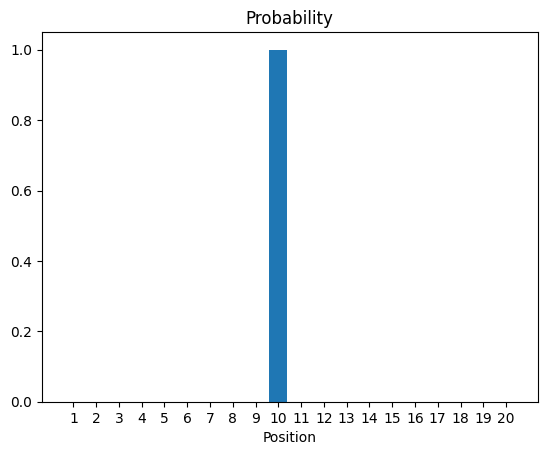

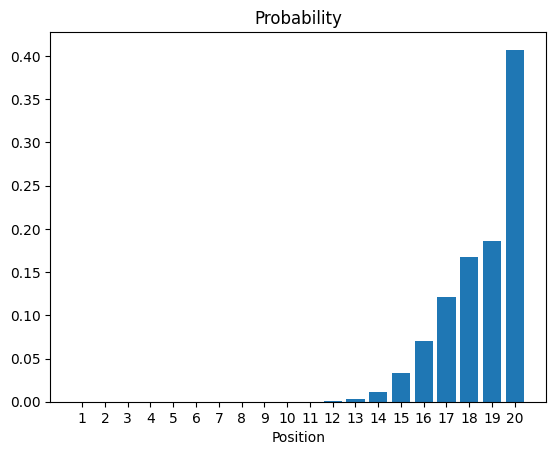

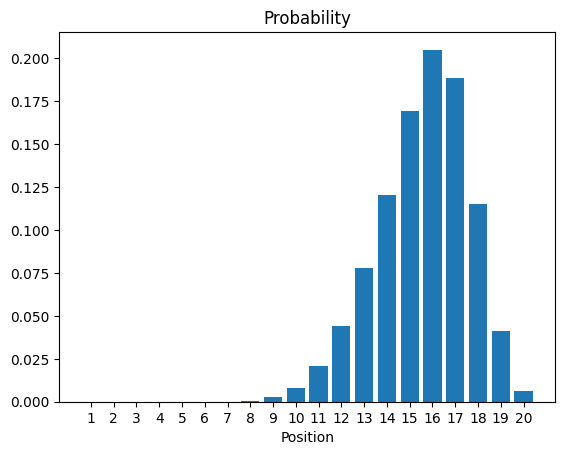

In [ ]:
# Define sequence of moves
map = starting_pos
visualizeBel(map)
for i in range(9):
  map = move_forward(map)
visualizeBel(map)

for i in range(3):
  map = move_backward(map)
visualizeBel(map)

In [ ]:
def stochastic_universal_sampling(population,fitness,number_of_output_sample):
    # Prepare rng generator
    rng = np.random.default_rng()
    # Prepare variables with values
    new_population = []
    interval = 1/number_of_output_sample # in this case sum of all values of fitness is equal to 1
    first_threshold = rng.uniform(0,1/number_of_output_sample)
    sum_till_each_sample = [0 for i in range(number_of_output_sample)]
    sum_till_each_sample[0] = fitness[0]
    
    for i in range(1,number_of_output_sample):
        sum_till_each_sample[i] = sum_till_each_sample[i-1] + fitness[i]

    # Generate population
    j = 0
    threshold = first_threshold
    for i in range(n):
        while(threshold > sum_till_each_sample[j]) :
            j = j + 1
        new_population.append(population[j])
        threshold = threshold + 1/number_of_output_sample
    return new_population

pop = [1    ,2    ,3    ,4    ,5    ,6    ,7    ,8    ,9    ,10]
fit = [0.2  ,0.05 ,0.1  ,0.05 ,0.3  ,0.1  ,0.1  ,0.04 ,0.02,0.04]
n = 10
print(stochastic_universal_sampling(pop,fit,n)) 

[1, 1, 2, 3, 5, 5, 5, 6, 7, 9]
